# The Sparks Foundation

### Graduate Rotational Internship (GRIP)

### April 2023 Batch

# Candidate Name :Shweta Kulkarni

# Task 1 : Prediction Using Supervised ML

### Business Case: predict the percentage of an student based on the no. of study hours.

## Simple Linear Regression Problem

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)

## Basic checks

In [4]:
# First Five rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Last five rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# shape of data
data.shape

(25, 2)

In [8]:
# columns of data
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
# Statics of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
# Renaming column
data.rename(columns={'Scores':'Percentage'},inplace=True)

In [13]:
# After renaming
data.head()

,Hours,Percentage
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

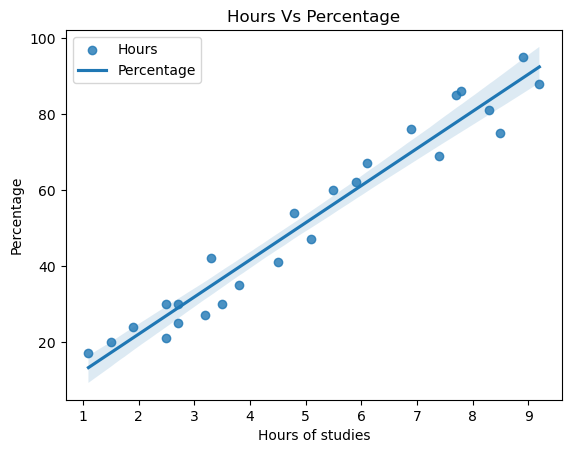

In [16]:
# Checking relation between hours and percentage via regression plot

sns.regplot(x=data['Hours'],y=data['Percentage'])
plt.title('Hours Vs Percentage')
plt.xlabel('Hours of studies')
plt.ylabel('Percentage')
plt.legend(data)
plt.show()

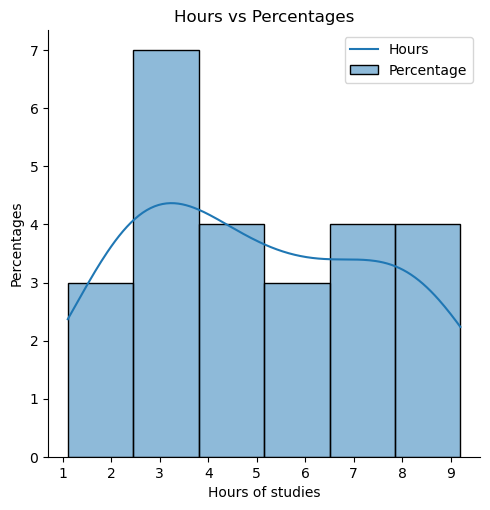

In [17]:
# checking the distribution of the Hours columns

sns.displot(data['Hours'], kde = True)
plt.title("Hours vs Percentages")
plt.xlabel("Hours of studies")
plt.ylabel("Percentages")
plt.legend(data)
plt.show()

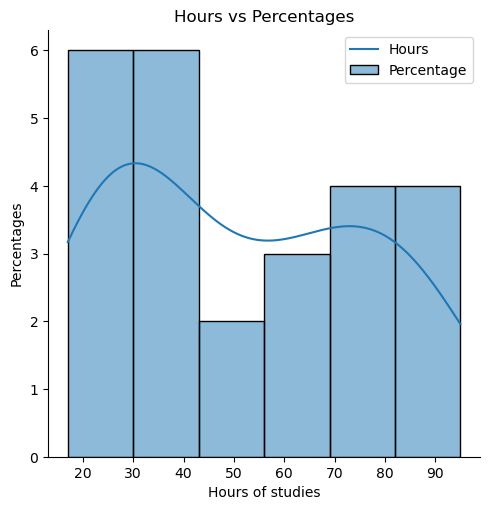

In [18]:
# checking the distribution of the percentage columns

sns.displot(data['Percentage'], kde = True)
plt.title("Hours vs Percentages")
plt.xlabel("Hours of studies")
plt.ylabel("Percentages")
plt.legend(data)
plt.show()

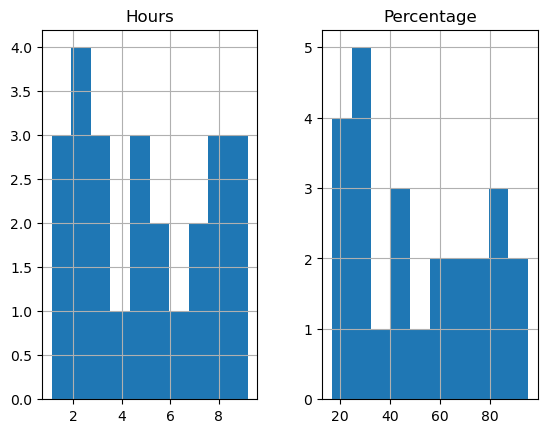

In [19]:
# summarizing the data

data.hist()
plt.show()

# Feature Selection

<AxesSubplot:>

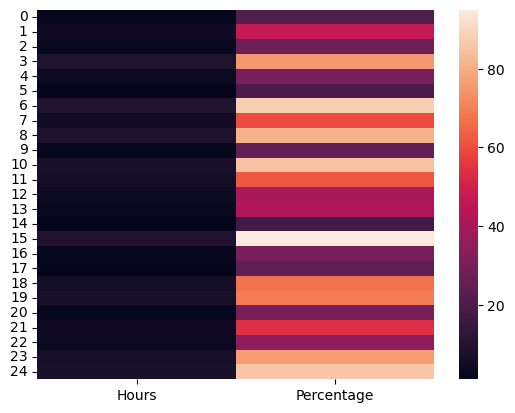

In [20]:
# checking the behaviour of the data
sns.heatmap(data)

# Model Selection

In [21]:
# Checking missing values
data.isnull().sum()

Hours         0
Percentage    0
dtype: int64

In [23]:
# Splitting data into two variables 

X = data.drop('Percentage', axis=1) # independent variable
y = data['Percentage'] ## dependent variable

print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (25, 1)
Shape of y :  (25,)


In [24]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [25]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Percentage, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 51)

print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (17, 1)
Shape of y_train :  (17,)
Shape of X_test :  (8, 1)
Shape of y_test :  (8,)


# Model Building

In [27]:
# Regression Model Building 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# training the model 

lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# The coefficients

print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [9.61405732]
Intercept:  3.370382388693173


In [29]:
# accuracy of the train data

lr.score(X_train, y_train)

0.9548526458597515

In [30]:
# accuray of the test data

lr.score(X_test, y_test)

0.9361670674106156

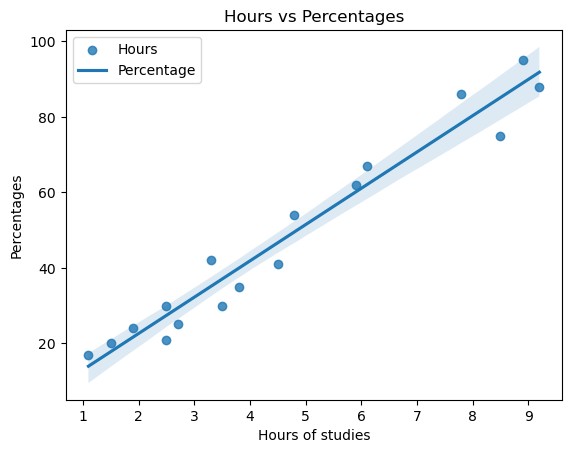

In [32]:
# checking the relation between hours and percentage after training the Regression Model via regression plot

sns.regplot(x = X_train, y = y_train)
plt.title("Hours vs Percentages")
plt.xlabel("Hours of studies")
plt.ylabel("Percentages")
plt.legend(data)
plt.show()

In [33]:
#Prediction value

y_pred = lr.predict(X_test)
y_pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

In [34]:
# Actual value

y_test

7     60
10    85
23    76
8     81
20    30
1     47
19    69
2     27
Name: Percentage, dtype: int64

In [35]:
#Actual value vs Prediction value

prediction = pd.DataFrame({'Actual Value':y_test,'Prediction Value':y_pred})
prediction

,Actual Value,Prediction Value
7,60,56.247698
10,85,77.398624
23,76,69.707378
8,81,83.167058
20,30,29.328337
1,47,52.402075
19,69,74.514407
2,27,34.135366


# Model Evaluation

In [37]:
y_pred = lr.predict(X_test)
y_pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

In [38]:
# actual price value

y_test

7     60
10    85
23    76
8     81
20    30
1     47
19    69
2     27
Name: Percentage, dtype: int64

In [41]:
#Importing metrics from sklearn library to the accuracy of the model

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [42]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2s = r2_score(y_test,y_pred)

print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
print("Mean Absolute Error : ",mae)
print("R2 Score Error : ",r2s)

Mean Squared Error :  28.388699379556982
Root Mean Squared Error :  5.328104670476828
Mean Absolute Error :  4.817108597564743
R2 Score Error :  0.9361670674106156


In [43]:
# predicting the score when student studies for 9.25 hours

lr.predict([[9.25]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.30041257])

* According to the Regression Model if a Student studies for 9.25 hours a day probabily the Percentage of the score is 92.30